In [28]:
import pickle

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

import sys
sys.path.append("..")
from vividict import Vividict

In [82]:
with open("xss.pickle", 'rb') as f:
    xss = pickle.load(f)
    
with open("xss-2.pickle", 'rb') as f:
    xss2 = pickle.load(f)
    
    
xsssi = xss['Sarsa']['uninterrupted'] + xss2['Sarsa']['uninterrupted'] 

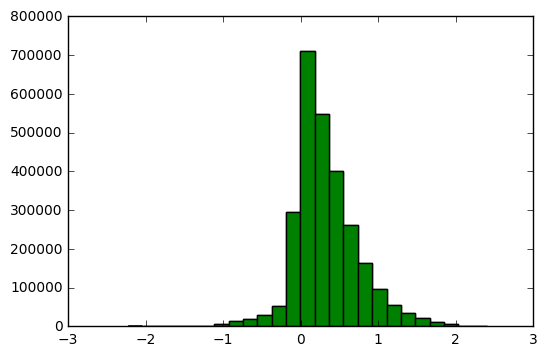

In [10]:
plt.hist(np.hstack(xss['Sarsa']['uninterrupted']), bins=25)
plt.show()

In [35]:
len(xss['Sarsa']['uninterrupted'])

hist_per_run = np.array([np.histogram(xs, bins=20, range=(-2.4, 2.4))[0]
                         for xs in xsssi])
cum_hist = np.cumsum(hist_per_run, axis=0)

In [26]:
hist_per_run.shape

(32, 20)

Note: http://matplotlib.org/examples/mplot3d/hist3d_demo.html

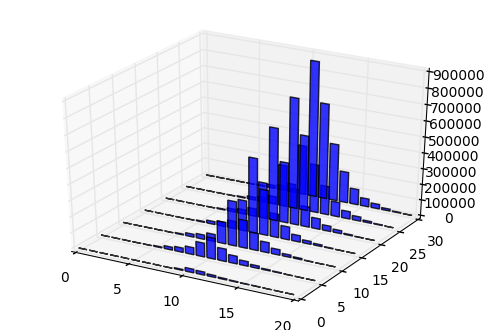

In [36]:
# Credits: http://stackoverflow.com/a/35225919/5091738
ax = plt.figure().add_subplot(111, projection='3d')
for n_run in xrange( len(xsssi) ):
    if n_run % 5 == 0:
        ax.bar(xrange(20), hist2d[n_run], zs=n_run, zdir='y', 
               alpha=0.8)
    
plt.show()
    

In [40]:
x_count = sum(len(xs) for xs in xsssi)

In [41]:
x_count

2736483

In [42]:
all_xs = np.hstack(xsssi)

In [58]:
run_of_x = np.hstack([np.full(len(xs), n_run)
                     for n_run, xs in enumerate(xsssi)])

In [51]:
run_of_x

array([ 0,  0,  0, ..., 31, 31, 31])

In [89]:
hist, x_edges, y_edges = np.histogram2d(all_xs, run_of_x, 
                                        bins=[51, len(xsssi) // 4])
hist = hist.T
cum_hist = np.cumsum(hist, axis=0)
norm_cum_hist = cum_hist / np.sum(cum_hist, axis=1)[:,None]

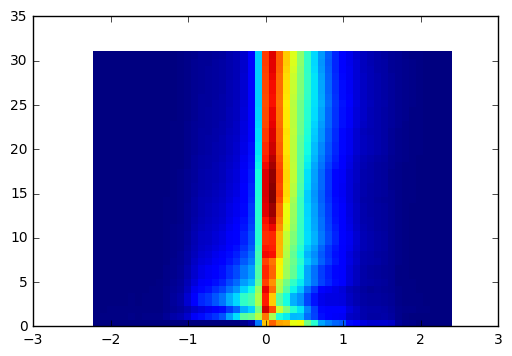

In [90]:
X, Y = np.meshgrid(x_edges, y_edges)
plt.pcolormesh(X, Y, norm_cum_hist)
plt.show()

In [72]:
hist.shape

(4, 20)

In [73]:
cum_hist.shape

(4, 20)

In [77]:
np.sum(cum_hist, axis=1)[:,None].shape

(4, 1)